In [1]:
import gym
import pandas as pd
import numpy as np
import random
from time import sleep
from itertools import combinations
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import clear_output
%matplotlib inline

In [2]:
random.seed(100)
env = gym.make('FrozenLake-v0')
env = env.unwrapped

In [3]:
env.render()


SFFF
FHFH
FFFH
HFFG


Action - 0: Left, 1: Down, 2: Right, 3: Up

In [4]:
state = env.observation_space.n
action = env.action_space.n
print((state, action))

(16, 4)


In [5]:
q_table_actual = np.zeros([state, action])
q_table_actual

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
total_episodes = 10000
total_test_episodes = 10
max_steps = 300

learning_rate = [0.1]
gamma = [0.99]
learning_rate, gamma = np.meshgrid(learning_rate, gamma)
combinations = np.c_[learning_rate.ravel(),gamma.ravel()]

epsilon = 1
max_epsilon = 1
min_epsilon = 0.01
decay_rate = 0.001

In [7]:
final_result = []
check = []
#tune learning rate and gamma
for lr, dr in combinations:
    state = env.observation_space.n
    action = env.action_space.n
    q_table = np.zeros([state, action])
    epsilon = 1
    #to check if the q_table is empty
    display(q_table)
    reward_for_all_episodes = []

    for episode in range(total_episodes):
        state = env.reset()
        done = False
        step = 0
        total_reward = 0
        for step in range(max_steps):
            random_value = random.uniform(0,1)
            if random_value > epsilon:
                action = np.argmax(q_table[state])
            else:
                action = env.action_space.sample()
            next_state, reward, done, info = env.step(action)

            #capture actual reward
            total_reward += reward
            #update q_table
            q_table[state, action] = q_table[state, action] + \
                                    lr * (reward + dr * (np.max(q_table[next_state]))- q_table[state, action])
            step +=1
            state = next_state

            if done:
                break
#                 print(f'Episode: {episode}, Step: {step}, Reward: {reward} Done: {done}')
        #update epsilon
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
        #append each episode's reward to a list
        reward_for_all_episodes.append(total_reward)

    average_reward = np.split(np.array(reward_for_all_episodes),total_episodes/1000)
    count = 0
    print(f'\nLearning rate: {lr}, Discount Rate: {dr}\n')
    for i in average_reward:
        count += i.shape[0]
        print(f'{count}: {sum(i) / i.shape[0]}')
    final_result.extend([[episode, lr, dr, sum(reward_for_all_episodes)]])

#     compare which combination of learning rate and gamma has the largest total reward,
#     save the final q_table to q_table_actual
    if check == []:
        check = [sum(reward_for_all_episodes)]
        q_table_actual = q_table
    else:
        if sum(reward_for_all_episodes) > check[0]:
            check = [sum(reward_for_all_episodes)]
            q_table_actual = q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])


Learning rate: 0.1, Discount Rate: 0.99

1000: 0.046
2000: 0.205
3000: 0.416
4000: 0.603
5000: 0.662
6000: 0.737
7000: 0.737
8000: 0.744
9000: 0.747
10000: 0.747


In [8]:
#save the result to a dataframe
final_result_df = pd.DataFrame(final_result, columns = ['Episode', 'Learning Rate', 'Discount Rate', 'Total Rewards'])

In [9]:
#best combination
final_result_df[final_result_df['Total Rewards'] == final_result_df['Total Rewards'].max()]


,Episode,Learning Rate,Discount Rate,Total Rewards
0,9999,0.1,0.99,5644.0


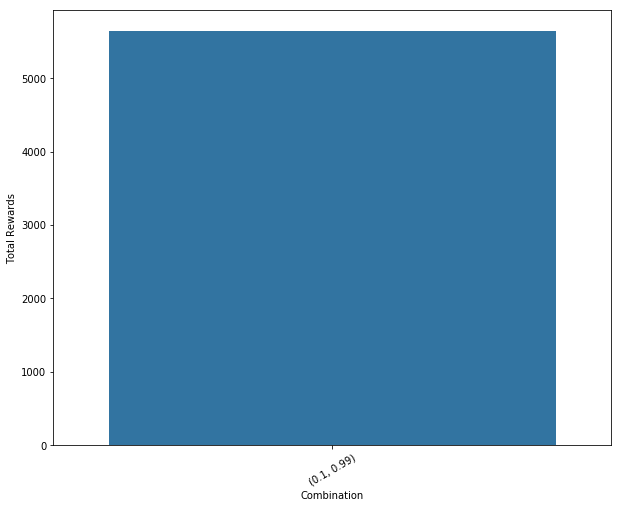

In [10]:
#plot graph
final_result_df['Combination'] =  list(zip(final_result_df['Learning Rate'], final_result_df['Discount Rate']))
plt.figure(figsize = (10,8))
ax = plt.axes()
ax = sns.barplot(final_result_df['Combination'], final_result_df['Total Rewards'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.show()

In [11]:
check

[5644.0]

In [12]:
q_dataframe = pd.DataFrame(q_table_actual)
q_dataframe.style.applymap(lambda x:'background-color:yellow' if x != 0 else '')

,0,1,2,3
0,0.525253,0.505232,0.509076,0.508116
1,0.302791,0.260185,0.240496,0.48265
2,0.411653,0.419758,0.39529,0.454881
3,0.270988,0.297537,0.255334,0.441833
4,0.537479,0.462423,0.422079,0.352166
5,0,0,0,0
6,0.192231,0.193258,0.392947,0.0968046
7,0,0,0,0
8,0.359526,0.476225,0.343846,0.571878
9,0.342248,0.631312,0.418071,0.329407


In [13]:
q_table

array([[0.52525345, 0.50523217, 0.50907581, 0.50811623],
       [0.30279071, 0.26018459, 0.24049645, 0.48264978],
       [0.41165287, 0.41975814, 0.39528957, 0.45488077],
       [0.27098841, 0.297537  , 0.25533433, 0.44183321],
       [0.53747857, 0.46242314, 0.42207916, 0.35216562],
       [0.        , 0.        , 0.        , 0.        ],
       [0.19223129, 0.19325753, 0.39294741, 0.09680458],
       [0.        , 0.        , 0.        , 0.        ],
       [0.35952556, 0.4762252 , 0.34384621, 0.57187794],
       [0.34224798, 0.63131249, 0.41807068, 0.32940734],
       [0.56631858, 0.4668969 , 0.30865992, 0.2412464 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.53331344, 0.58549323, 0.73475139, 0.4684526 ],
       [0.7339133 , 0.84751941, 0.740441  , 0.69855399],
       [0.        , 0.        , 0.        , 0.        ]])

In [14]:
#play the game
%time
Win = 0
Lose = 0
average_step = []
for episode in range(total_test_episodes):
    state = env.reset()
    done = False
    step_episode = 0
    for step in range(max_steps):
        action = np.argmax(q_table_actual[state])
        next_state, reward, done, info = env.step(action)
        clear_output(wait = True)
        print(f'Game: {episode + 1}, Step: {step}, Reward: {reward}\n')
        print(env.render(mode = 'ansi'))
        sleep(0.5)
        state = next_state
        step_episode += 1
        if done:
            if reward == 1:
                Win +=1
                average_step.append(step_episode)
            else:
                Lose +=1
            break
    sleep(2)
print(f'Total Game: {total_test_episodes}\nWin: {Win}\nLose: {Lose}\nAverage Steps: {sum(average_step)/Win}')

Game: 10, Step: 52, Reward: 1.0

  (Down)
SFFF
FHFH
FFFH
HFFG

Total Game: 10
Win: 9
Lose: 1
Average Steps: 36.888888888888886
